# Pre Processing

## imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# from IPython.display import Audio

# import librosa
# import librosa.display

In [24]:
# import tensorflow as tf
# from keras.utils import np_utils
# from keras.layers.merge import concatenate
# from tensorflow.keras.models import Sequential, Model, load_model

# from tensorflow.keras.layers import Conv1D, Conv2D, SeparableConv1D, MaxPooling1D, MaxPooling2D
# from tensorflow.keras.layers import Input, add, Flatten, Dense, BatchNormalization, Dropout, LSTM, GRU
# from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalMaxPooling2D, Activation, LeakyReLU, ReLU


# from tensorflow.keras import regularizers
# from tensorflow.keras import backend as K
# from tensorflow.keras.optimizers import Adamax
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [25]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
# from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

## Loading Data

In [4]:
data_folder = '../data/raw/Respiratory_Sound_Database/Respiratory_Sound_Database/'

In [5]:
audio_data = f'{data_folder}/audio_and_txt_files'

In [6]:
diagnosis_df=pd.read_csv(f'{data_folder}/patient_diagnosis.csv',names=['pid','disease'])

## EDA

In [7]:
diagnosis_df.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [8]:
diagnosis_df['disease'].unique()

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [9]:
diagnosis_df['disease'].nunique()

8

In [10]:
diagnosis_df['disease'].value_counts()

disease
COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

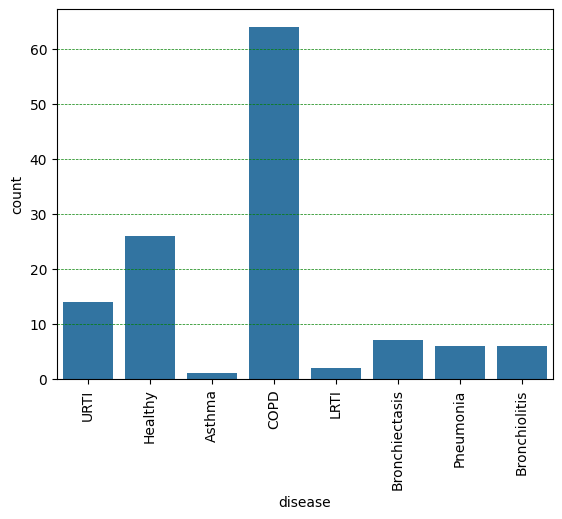

In [11]:
sns.countplot(data=diagnosis_df, x='disease')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)

In [12]:
len(diagnosis_df['pid'])

126

In [13]:
diagnosis_df['pid'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226])

In [14]:
len(diagnosis_df['pid'].unique())

126

In [18]:
diagnosis_df['pid'].value_counts()

pid
101    1
180    1
193    1
192    1
191    1
      ..
138    1
137    1
136    1
135    1
226    1
Name: count, Length: 126, dtype: int64

In [19]:
diagnosis_df['disease'].unique()

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [20]:
# List of diseases to be replaced
to_replace = ['URTI', 'LRTI', 'Bronchiolitis', 'Pneumonia']

# Replacement value
replacement = 'Acute'

# Replace values in the 'disease' column
diagnosis_df['disease'] = diagnosis_df['disease'].replace(to_replace, replacement)

# Check the unique values to verify the replacement
print(diagnosis_df['disease'].unique())

['Acute' 'Healthy' 'Asthma' 'COPD' 'Bronchiectasis']


In [21]:
# List of diseases to be replaced
to_replace = ['Asthma','COPD','Bronchiectasis']

# Replacement value
replacement = 'Chronic'

# Replace values in the 'disease' column
diagnosis_df['disease'] = diagnosis_df['disease'].replace(to_replace, replacement)

# Check the unique values to verify the replacement
print(diagnosis_df['disease'].unique())

['Acute' 'Healthy' 'Chronic']


([0, 1, 2],
 [Text(0, 0, 'Acute'), Text(1, 0, 'Healthy'), Text(2, 0, 'Chronic')])

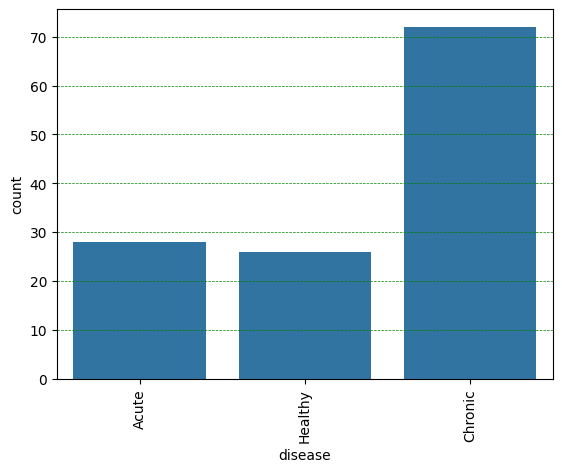

In [22]:
sns.countplot(data=diagnosis_df, x='disease')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)

In [23]:
diagnosis_df.to_csv('modified_patient_diagnosis.csv', index=False)

In [24]:
diagnosis_df

,pid,disease
0,101,Acute
1,102,Healthy
2,103,Chronic
3,104,Chronic
4,105,Acute
...,...,...
121,222,Chronic
122,223,Chronic
123,224,Healthy
124,225,Healthy
